In [1]:
import pandas as pd
import numpy as np
import random

from sklearn.utils import shuffle
import tensorflow as tf
from helpers import one_hot_encode, get_batch, get_training_set, get_test_set, log
from params import HyperParameter

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
file = r'data/fer2013.csv'
df = pd.read_csv(file)

g1 = df.groupby( [ "emotion"] ).count()
g1.head(10)


,pixels,Usage
emotion,,
0,4953,4953
1,547,547
2,5121,5121
3,8989,8989
4,6077,6077
5,4002,4002
6,6198,6198


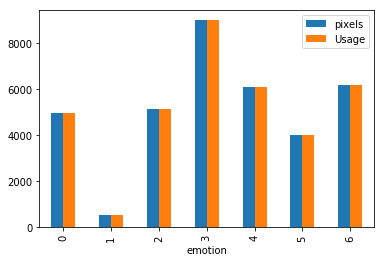

In [5]:
my_plot = g1.plot(kind='bar')

## Data

### Training

In [6]:
df.loc[df['Usage'] == 'Training'].head(5)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


## Test

In [7]:
df.loc[df['Usage'] == 'PublicTest'].head(5)

,emotion,pixels,Usage
28709,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...,PublicTest
28710,1,156 184 198 202 204 207 210 212 213 214 215 21...,PublicTest
28711,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...,PublicTest
28712,6,205 203 236 157 83 158 120 116 94 86 155 180 2...,PublicTest
28713,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...,PublicTest


## Initialize data

In [8]:
train_X, train_y = get_training_set(df.loc[df['Usage'] == 'Training'])
test_X, test_y = get_test_set(df.loc[df['Usage'] == 'PublicTest'])
validate_X, validate_y = get_test_set(df.loc[df['Usage'] == 'PrivateTest'])

## Images

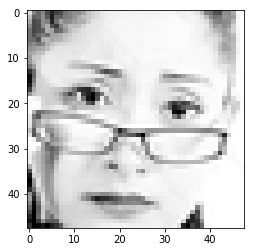

In [11]:
plt.imshow(train_X[random.randint(1,train_X.shape[0])].reshape(48,48),cmap='gist_gray')   

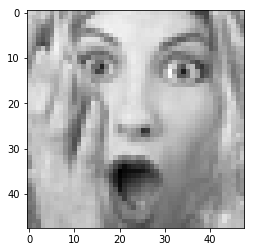

In [12]:
plt.imshow(train_X[random.randint(1,train_X.shape[0])].reshape(48,48),cmap='gist_gray')   

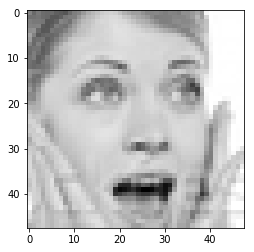

In [13]:
plt.imshow(train_X[random.randint(1,train_X.shape[0])].reshape(48,48),cmap='gist_gray')   

In [14]:
labels = 7
image_size = 2304

## Linear Classification

### Hyper parameters

In [22]:
params = HyperParameter(num_batches=64, batch_size=32,
                        epoch=1000, learning_rate=.5,hold_prob=0.5)

log(params)


:  epoch: 1000, num_batches: 64, batch_size: 32, learning_rate: 0.5, hold_prob: (0.5,)


In [17]:
from linear_classifier import LinearClassifer
model = LinearClassifer(params=params, labels=labels, image_size=image_size)

accuracyMap = model.run(train_X=train_X, train_y=train_y, test_X=test_X,
          test_y=test_y, validate_X=validate_X, validate_y=validate_y)


Epoch:  0
model accuracy:  0.1713569313287735
Epoch:  100
model accuracy:  0.22624686360359192
Epoch:  200
model accuracy:  0.29451102018356323
Epoch:  300
model accuracy:  0.2911674678325653
Epoch:  400
model accuracy:  0.25717470049858093
Epoch:  500
model accuracy:  0.19141821563243866
Epoch:  600
model accuracy:  0.16160491108894348
Epoch:  700
model accuracy:  0.3101142346858978
Epoch:  800
model accuracy:  0.205906942486763
Epoch:  900
model accuracy:  0.29674002528190613
Final accuracy:  0.22457508742809296


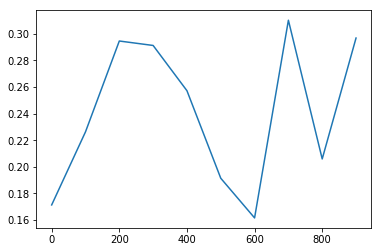

In [18]:
epochs = [int(p) for p in accuracyMap.keys()]
plt.plot(epochs,list(accuracyMap.values()))


## CNN

### Hyper parameters

In [20]:
params = HyperParameter(num_batches=644, batch_size=32,
                        epoch=1000, learning_rate=.5,hold_prob=0.5,epoch_to_report=10)

log(params)


:  epoch: 1000, num_batches: 644, batch_size: 32, learning_rate: 0.5, hold_prob: (0.5,)


In [21]:
from cnn import CNN
model = CNN(params=params, labels=labels, image_size=image_size)


model.run(train_X=train_X, train_y=train_y, test_X=test_X,
          test_y=test_y, validate_X=validate_X, validate_y=validate_y)

KeyboardInterrupt: 